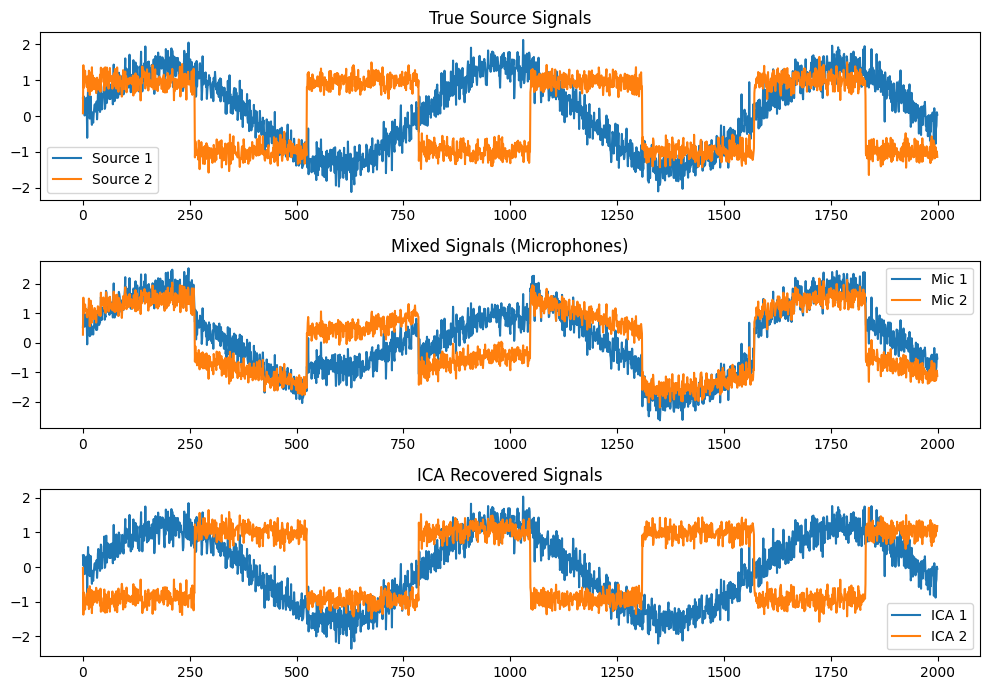

In [2]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# -----------------------------
# 1. Create two source signals
# -----------------------------
np.random.seed(0)
N = 2000
time = np.linspace(0, 8, N)

s1 = np.sin(2 * time)                    # Source 1: sinusoid
s2 = np.sign(np.sin(3 * time))           # Source 2: square wave (more non-Gaussian)

S = np.c_[s1, s2]
S = S + 0.2 * np.random.normal(size=S.shape)   # Add noise

# Standardize
S /= S.std(axis=0)

# -----------------------------
# 2. Create mixed microphone signals (A * S)
# -----------------------------
A = np.array([[1, 0.5],
              [0.4, 1]])   # Mixing matrix

X = S @ A.T                # Observed mixed signals (what microphones record)

# -----------------------------
# 3. Apply ICA (FastICA)
# -----------------------------
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(X)      # Estimated sources
A_est = ica.mixing_               # Estimated mixing matrix

# -----------------------------
# 4. Plot results
# -----------------------------
plt.figure(figsize=(10, 7))

plt.subplot(3, 1, 1)
plt.title("True Source Signals")
plt.plot(S)
plt.legend(['Source 1', 'Source 2'])

plt.subplot(3, 1, 2)
plt.title("Mixed Signals (Microphones)")
plt.plot(X)
plt.legend(['Mic 1', 'Mic 2'])

plt.subplot(3, 1, 3)
plt.title("ICA Recovered Signals")
plt.plot(S_ica)
plt.legend(['ICA 1', 'ICA 2'])

plt.tight_layout()
plt.show()
